In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/android-app-market-on-google-play/datasets/apps.csv
/kaggle/input/android-app-market-on-google-play/datasets/user_reviews.csv


In [50]:
1. DATA PREPARATION

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
#LOAD THE DATA
data=pd.read_csv('/kaggle/input/android-app-market-on-google-play/datasets/apps.csv')

In [6]:
#CLEAN THE DATA 
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)

In [24]:
# Handle missing values
data['Size'].fillna(data['Size'].mean(), inplace=True)


/tmp/ipykernel_33/4193707981.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Size'].fillna(data['Size'].mean(), inplace=True)


In [45]:
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
data['Price'] = data['Price'].apply(lambda x: float(x.replace('$', '')) if isinstance(x, str) else x)

In [46]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 9658
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7021 non-null   int64  
 1   App             7021 non-null   object 
 2   Category        7021 non-null   object 
 3   Rating          7021 non-null   float64
 4   Reviews         7021 non-null   int64  
 5   Size            7021 non-null   float64
 6   Installs        7021 non-null   int64  
 7   Type            7021 non-null   object 
 8   Price           7021 non-null   float64
 9   Content Rating  7021 non-null   object 
 10  Genres          7021 non-null   object 
 11  Last Updated    7021 non-null   object 
 12  Current Ver     7021 non-null   object 
 13  Android Ver     7021 non-null   object 
 14  Sentiment       7021 non-null   float64
dtypes: float64(4), int64(3), object(8)
memory usage: 877.6+ KB
None


In [29]:
2. Category Exploration

# Distribution of apps across categories
category_counts = data['Category'].value_counts()

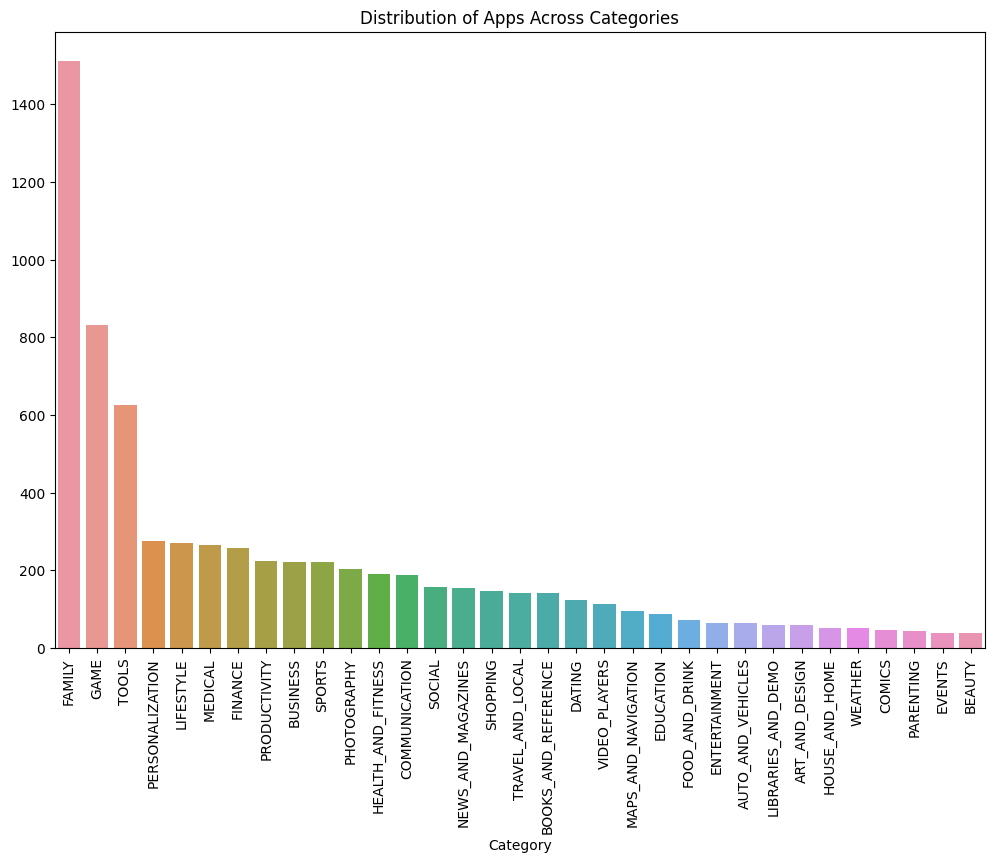

In [30]:
# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xticks(rotation=90)
plt.title('Distribution of Apps Across Categories')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


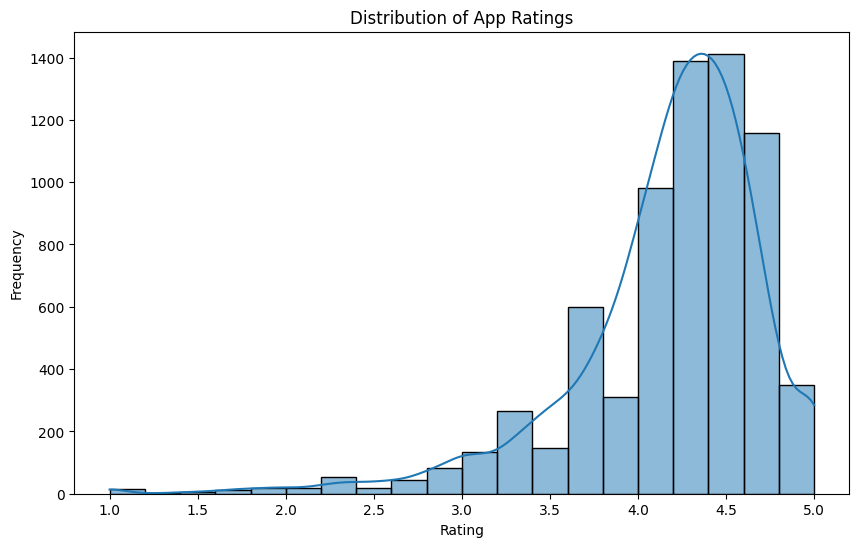

In [32]:
3. Metrics Analysis

# Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

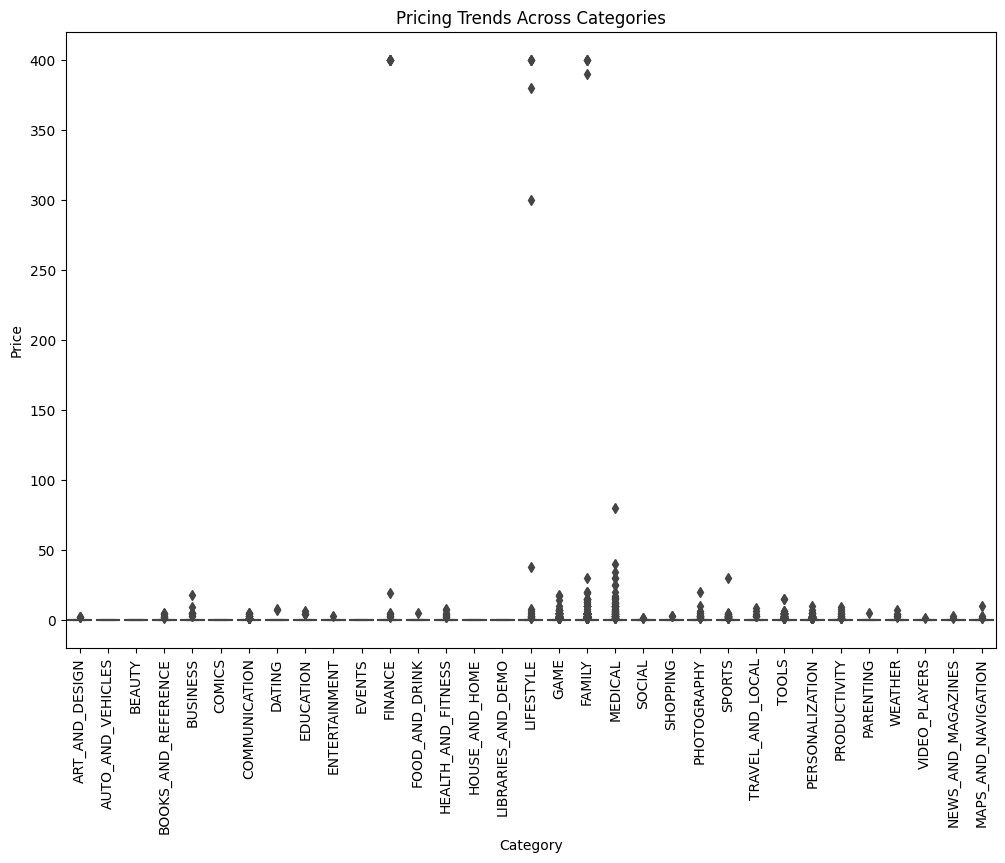

In [37]:
# Pricing Trends Across Categories
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Price', data=data)
plt.xticks(rotation=90)
plt.title('Pricing Trends Across Categories')
plt.show()

In [38]:
4. Sentiment Analysis

from textblob import TextBlob


In [61]:
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity


In [ ]:
data['Sentiment'] = data['reviews'].apply(get_sentiment)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


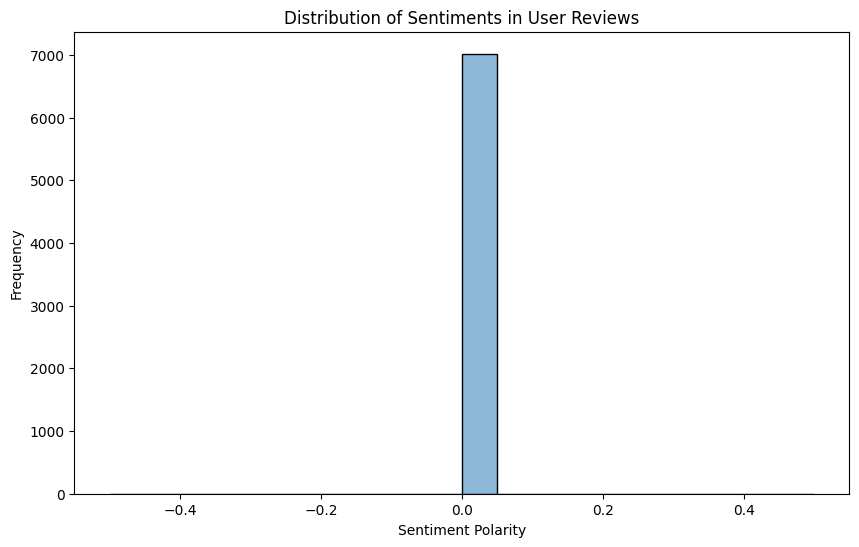

In [40]:
# Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Sentiment'], bins=20, kde=True)
plt.title('Distribution of Sentiments in User Reviews')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

In [42]:
5. Interactive Visualization

fig = px.box(data, x='Category', y='Rating', title='Ratings by Category', labels={'Rating': 'App Rating'})
fig.show()